<a href="https://colab.research.google.com/github/KorhanErkan/Week_10_Alperen_Hoca/blob/master/Week10_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ödev 1:
Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz.
Ağ yapısı:
Conv2D(32,(3,3))
relu activation
Conv2D(64,(3,3))
relu activation
Maxpooling ((2,2))
Conv2D(128,(3,3))
relu activation
Conv2D(64,(3,3))
relu activation
Flatten()
Dense 256
dropout 0.25
dense 128
dropout 0.3
dense layer for last (Buradaki bilgileri sizden bekliyorum.)

10 epoch olacak şekilde çalıştırmanızı isitiyorum.

daha sonrasında bathc_size 32 64 128 256 512 1024 olacak şekilde deneyiniz. Accuracy değerlerini ve çalışma süreleriniz karşılaştırnız. Bunu plot olarak çizdiriniz

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
from keras.utils.data_utils import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 6 tane imaj 
# random seçicez
# göstermesi

for i in range(0,6):

  rand_num = random.randint(0,len(x_train))
  img = x_train[rand_num]
  cv2_imshow(img)


In [ ]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[1]

In [ ]:
x_train=x_train.reshape(len(x_train),img_rows,img_cols,1)
x_test=x_test.reshape(len(x_test),img_rows,img_cols,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_train=x_train.astype("float64")
x_test=x_test.astype("float64")

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD

model=Sequential()

model.add(Conv2D(32,(3,3),activation = "relu",input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation = "relu"))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))


model.add(Dense(10, activation = "sigmoid")) 


model.compile(loss = "binary_crossentropy", optimizer = 'rmsprop', metrics = ["accuracy"])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                        

In [ ]:
import time

In [ ]:
start_time1 = time.time()
batch_size1 = 32
epochs = 10
history1 = model.fit(x_train,y_train,batch_size=batch_size1,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score1 = model.evaluate(x_test, y_test)
time1 = (time.time() - start_time1)
print("test loss:", score1[0])
print("test acc:", score1[1])
print(time1)

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.0303 - accuracy: 0.9592 - val_loss: 0.0094 - val_accuracy: 0.9874
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0118 - accuracy: 0.9877 - val_loss: 0.0058 - val_accuracy: 0.9923
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0103 - accuracy: 0.9906 - val_loss: 0.0057 - val_accuracy: 0.9926
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0100 - accuracy: 0.9914 - val_loss: 0.0118 - val_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0103 - accuracy: 0.9903 - val_loss: 0.0073 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0100 - accuracy: 0.9917 - val_loss: 0.0118 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0102 - accuracy: 0.9916 - val_loss: 0.0129 - val_ac

In [ ]:
start_time2 = time.time()
batch_size2 = 64
epochs = 10
history2 = model.fit(x_train,y_train,batch_size=batch_size2,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score2 = model.evaluate(x_test, y_test)
time2 = (time.time() - start_time2)
print("test loss:", score2[0])
print("test acc:", score2[1])
print(time2)

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0088 - val_accuracy: 0.9936
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0066 - accuracy: 0.9954 - val_loss: 0.0091 - val_accuracy: 0.9925
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0065 - accuracy: 0.9957 - val_loss: 0.0116 - val_accuracy: 0.9930
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0064 - accuracy: 0.9960 - val_loss: 0.0084 - val_accuracy: 0.9927
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0060 - accuracy: 0.9963 - val_loss: 0.0092 - val_accuracy: 0.9939
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0056 - accuracy: 0.9965 - val_loss: 0.0087 - val_accuracy: 0.9934
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0058 - accuracy: 0.9964 - val_loss: 0.0125 - val_accuracy: 0.9925
Epoch 

In [ ]:
start_time3 = time.time()
batch_size3 = 128
epochs = 10
history3 = model.fit(x_train,y_train,batch_size=batch_size3,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score3 = model.evaluate(x_test, y_test)
time3 = (time.time() - start_time3)
print("test loss:", score3[0])
print("test acc:", score3[1])
print(time3)

Epoch 1/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0037 - accuracy: 0.9978 - val_loss: 0.0085 - val_accuracy: 0.9941
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.0129 - val_accuracy: 0.9919
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0031 - accuracy: 0.9985 - val_loss: 0.0151 - val_accuracy: 0.9935
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0252 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0033 - accuracy: 0.9985 - val_loss: 0.0116 - val_accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.0297 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0154 - val_accuracy: 0.9931

In [ ]:
start_time4 = time.time()
batch_size4 = 256
epochs = 10
history4 = model.fit(x_train,y_train,batch_size=batch_size4,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score4 = model.evaluate(x_test, y_test)
time4 = (time.time() - start_time4)
print("test loss:", score4[0])
print("test acc:", score4[1])
print(time4)

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0162 - val_accuracy: 0.9937
Epoch 2/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0169 - val_accuracy: 0.9931
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0161 - val_accuracy: 0.9949
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0138 - val_accuracy: 0.9943
Epoch 5/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0173 - val_accuracy: 0.9929
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0174 - val_accuracy: 0.9938
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0176 - val_accuracy: 0.9946

In [ ]:
start_time5 = time.time()
batch_size5 = 512
epochs = 10
history5 = model.fit(x_train,y_train,batch_size=batch_size5,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score5 = model.evaluate(x_test, y_test)
time5 = (time.time() - start_time5)
print("test loss:", score5[0])
print("test acc:", score5[1])

print(time5)

Epoch 1/10
118/118 [==============================] - 5s 36ms/step - loss: 9.8992e-04 - accuracy: 0.9998 - val_loss: 0.0165 - val_accuracy: 0.9953
Epoch 2/10
118/118 [==============================] - 4s 35ms/step - loss: 9.9183e-04 - accuracy: 0.9998 - val_loss: 0.0179 - val_accuracy: 0.9946
Epoch 3/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 4/10
118/118 [==============================] - 4s 35ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0183 - val_accuracy: 0.9951
Epoch 5/10
118/118 [==============================] - 4s 34ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0199 - val_accuracy: 0.9937
Epoch 6/10
118/118 [==============================] - 4s 35ms/step - loss: 9.2939e-04 - accuracy: 0.9999 - val_loss: 0.0235 - val_accuracy: 0.9951
Epoch 7/10
118/118 [==============================] - 4s 35ms/step - loss: 8.9670e-04 - accuracy: 0.9999 - val_loss: 0.0168 - val_

In [ ]:
start_time6 = time.time()
batch_size6 = 1024
epochs = 10
history6 = model.fit(x_train,y_train,batch_size=batch_size6,epochs=epochs,validation_data=(x_test,y_test), verbose = 1) 
score6 = model.evaluate(x_test, y_test)
time6 = (time.time() - start_time6)
print("test loss:", score6[0])
print("test acc:", score6[1])

print(time6)

Epoch 1/10
59/59 [==============================] - 6s 86ms/step - loss: 5.5764e-04 - accuracy: 0.9999 - val_loss: 0.0215 - val_accuracy: 0.9949
Epoch 2/10
59/59 [==============================] - 4s 67ms/step - loss: 7.0043e-04 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9935
Epoch 3/10
59/59 [==============================] - 4s 67ms/step - loss: 6.6464e-04 - accuracy: 0.9999 - val_loss: 0.0245 - val_accuracy: 0.9935
Epoch 4/10
59/59 [==============================] - 4s 66ms/step - loss: 5.7288e-04 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9932
Epoch 5/10
59/59 [==============================] - 4s 67ms/step - loss: 4.8152e-04 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9947
Epoch 6/10
59/59 [==============================] - 4s 66ms/step - loss: 5.3294e-04 - accuracy: 0.9999 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoch 7/10
59/59 [==============================] - 4s 66ms/step - loss: 3.6720e-04 - accuracy: 1.0000 - val_loss: 0.0169 - val_ac

In [ ]:
scores = [score1[1], score2[1], score3[1], score4[1], score5[1], score6[1]]
times = [time1, time2, time3, time4, time5, time6]
batch = [batch_size1, batch_size2, batch_size3, batch_size4, batch_size5, batch_size6]
labels = ["Batch Size 1", "Batch Size 2", "Batch Size 3", "Batch Size 4", "Batch Size 5", "Batch Size 6"]
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

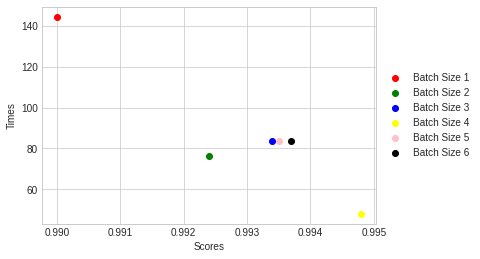

In [ ]:
plt.scatter(scores[0], times[0], alpha=1, label= labels[0],  c=colors[0])
plt.scatter(scores[1], times[1], alpha=1, label= labels[1],  c=colors[1])
plt.scatter(scores[2], times[2], alpha=1, label= labels[2],  c=colors[2])
plt.scatter(scores[3], times[3], alpha=1, label= labels[3],  c=colors[3])
plt.scatter(scores[4], times[4], alpha=1, label= labels[4],  c=colors[4])
plt.scatter(scores[5], times[5], alpha=1, label= labels[5],  c=colors[5])
plt.xlabel("Scores")
plt.ylabel("Times")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()